In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Linear

In [13]:
df = pd.read_csv("mlr.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [14]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

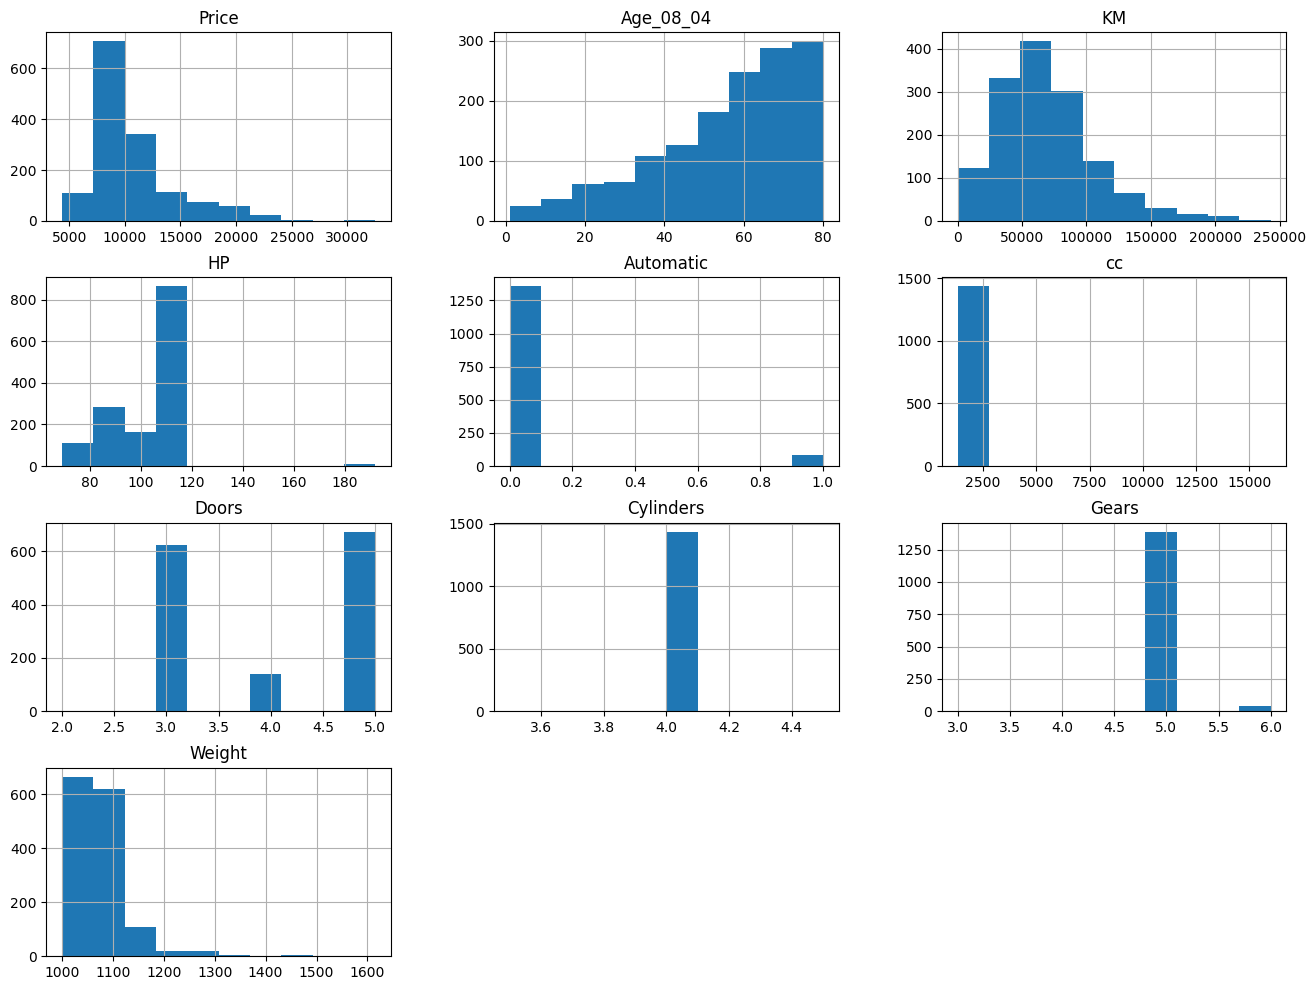

In [15]:
df.hist(figsize=(16,12))
plt.show()

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# --------------------------
# ENCODE CATEGORICAARIABLESL V
# --------------------------
df = pd.get_dummies(df, drop_first=True)

# --------------------------
#DEFINE TARGET & FEATURES
# --------------------------
y = df['Price']
X = df.drop(columns=['Price'])

# --------------------------


In [17]:
#TRAIN–TEST SPLIT
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [ ]:
# ======================================================
# MODEL 1: BASIC MULTIPLE LINEAR REGRESSION
# ======================================================
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("----- MODEL 1: BASIC MLR -----")
print("Intercept:", model1.intercept_)
coeff_model1 = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model1.coef_
})
print(coeff_model1)

# Predictions
y_pred1 = model1.predict(X_test)


# ======================================================
# MODEL 2: STANDARDIZED MLR
# ======================================================
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

print("\n----- MODEL 2: STANDARDIZED MLR -----")
print("Intercept:", model2.intercept_)

coeff_model2 = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model2.coef_
})
print(coeff_model2)

# Predictions
y_pred2 = model2.predict(X_test_scaled)


# ======================================================
# MODEL 3: FEATURE-SELECTED MLR
# (Example: Choose top 5 features by absolute correlation)
# ======================================================
corr = df.corr()['Price'].abs().sort_values(ascending=False)
top_features = corr.index[1:6]    # skip 'price'

X_train_fs = X_train[top_features]
X_test_fs  = X_test[top_features]

model3 = LinearRegression()
model3.fit(X_train_fs, y_train)

print("\n----- MODEL 3: FEATURE-SELECTED MLR -----")
print("Selected Features:", top_features.values)
print("Intercept:", model3.intercept_)

coeff_model3 = pd.DataFrame({
    "Feature": top_features,
    "Coefficient": model3.coef_
})
print(coeff_model3)

# Predictions
y_pred3 = model3.predict(X_test_fs)

<class 'NameError'>: name 'LinearRegression' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_test  = actual values
# y_pred  = predictions from your model

# R² Score
r2 = r2_score(y_test, y_pred3)

# Adjusted R²
n = X_test.shape[0]          # number of samples
p = X_test.shape[1]          # number of features
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

# MSE & RMSE
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_test, y_pred3)

print("----- MODEL PERFORMANCE -----")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


In [10]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --------------------------------------------------
# LASSO REGRESSION
# --------------------------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

# Performance metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_lasso = 1 - (1-r2_lasso) * (n-1) / (n-p-1)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("============== LASSO REGRESSION ==============")
print("Coefficients:", lasso.coef_)
print(f"R² Score: {r2_lasso:.4f}")
print(f"Adjusted R²: {adj_r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")


# --------------------------------------------------
# RIDGE REGRESSION
# --------------------------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

# Performance metrics
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = 1 - (1-r2_ridge) * (n-1) / (n-p-1)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\n============== RIDGE REGRESSION ==============")
print("Coefficients:", ridge.coef_)
print(f"R² Score: {r2_ridge:.4f}")
print(f"Adjusted R²: {adj_r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")


<class 'NameError'>: name 'X_train_scaled' is not defined

In [8]:
"""What is Normalization & Standardization and how is it helpful?
Normalization : Arranging the values in -3 to +3. Which helps the 99.8% values will be lies in between them
Stadardization : Which remove the units and helps in to do machine learning algorithms"""

'What is Normalization & Standardization and how is it helpful?\nNormalization : Arranging the values in -3 to +3. Which helps the 99.8% values will be lies in between them\nStadardization : Which remove the units and helps in to do machine learning algorithms'

In [9]:
"""What techniques can be used to address multicollinearity in multiple linear regression?
Correaltion is used to check the relation between the x and x value if it having high correlation we can remove one of the varibles and also we use the pca method"""

'What techniques can be used to address multicollinearity in multiple linear regression?\nCorrealtion is used to check the relation between the x and x value if it having high correlation we can remove one of the varibles and also we use the pca method'